In [37]:
import time
from election_functions import ElectionGame
from eraser import Eraser
from election_functions import get_election_results, get_reward_matrices, get_rep_states, get_dem_states
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [42]:
# Select Election Year
election_year = 2016

In [ ]:
payoff_df = pd.DataFrame()

# Generate Reward Functions
clean_election_results, state_list, electoral_votes = get_election_results(election_year)
republican_states = get_rep_states(clean_election_results, state_list)
democrat_states = get_dem_states(clean_election_results, state_list)

# define attacker types here
attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]

partisan_type_list = [[False],
                      [True],
                      [True],
                      [False,True,True]]

description_list = ['publicity_hacker','democrat_hacker','republican_hacker','mixed_hackers']

In [40]:
for a in tqdm(range(4)):
    a=1
    attack_list = attack_targets_list[a]
    partisan_type = partisan_type_list[a]
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
#         print(eraser_solver.opt_coverage)
    payoff_df[description_list[a]] = payoffs

100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


In [5]:
payoff_df

,publicity_hacker,democrat_hacker,republican_hacker,mixed_hackers
0,3.43922,-5.29943,5.63432,3.43922
1,7.67940,2.12016,15.64130,7.67940
2,9.86224,6.90304,20.42620,9.86224
3,11.44330,9.82636,23.80600,11.44330
4,12.67290,12.06320,26.42500,12.67290
5,13.72290,13.61980,28.47130,13.72290
6,14.64700,15.02440,30.30200,14.64700
7,15.56410,16.29430,32.06610,15.56410
8,16.48120,17.33610,33.06450,16.48120
9,17.39830,18.32000,33.58680,17.39830


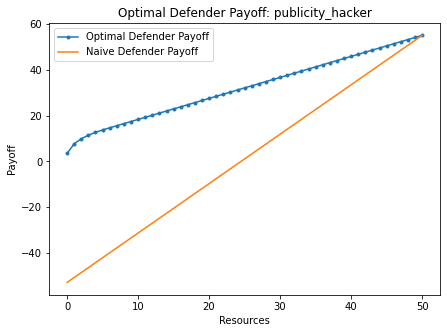

In [6]:
hacker_type = 'publicity_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig(str(election_year)+'_PH_payoff.png', dpi = 300)

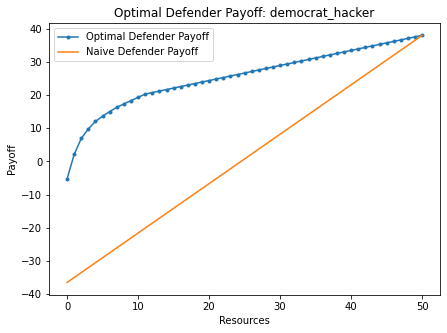

In [7]:
hacker_type = 'democrat_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig(str(election_year)+'_DH_payoff.png', dpi = 300)

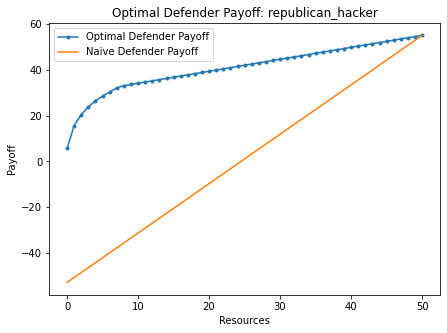

In [8]:
hacker_type = 'republican_hacker'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig(str(election_year)+'_RH_payoff.png', dpi = 300)

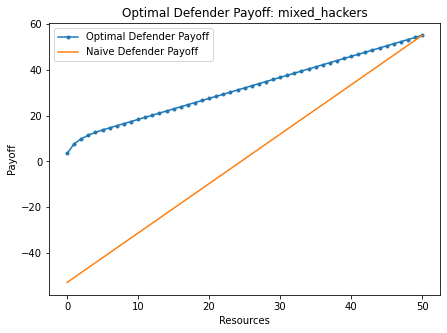

In [9]:
hacker_type = 'mixed_hackers'
plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df[hacker_type],'.-')
plt.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
plt.legend(['Optimal Defender Payoff', 'Naive Defender Payoff'])
plt.title('Optimal Defender Payoff: '+hacker_type)
plt.xlabel('Resources')
plt.ylabel('Payoff')
plt.savefig(str(election_year)+'_MH_payoff.png', dpi = 300)

# The following few cells were used to generate the Figures used in the Project Report

## Figure 3

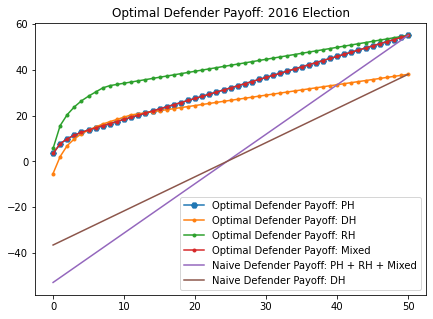

In [26]:
import time
from election_functions import ElectionGame
from eraser import Eraser
from election_functions import get_election_results, get_reward_matrices, get_rep_states, get_dem_states
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

election_year = 2016

payoff_df = pd.DataFrame()

# Generate Reward Functions
clean_election_results, state_list, electoral_votes = get_election_results(election_year)
republican_states = get_rep_states(clean_election_results, state_list)
democrat_states = get_dem_states(clean_election_results, state_list)

# define attacker types here
attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]

partisan_type_list = [[False],
                      [True],
                      [True],
                      [False,True,True]]

description_list = ['publicity_hacker','democrat_hacker','republican_hacker','mixed_hackers']

for a in range(4):
    attack_list = attack_targets_list[a]
    partisan_type = partisan_type_list[a]
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[a]] = payoffs


plt.rcParams['figure.figsize']=(7,5)
plt.plot(range(51),payoff_df['publicity_hacker'],'H-')
plt.plot(range(51),payoff_df['democrat_hacker'],'.-')
plt.plot(range(51),payoff_df['republican_hacker'],'.-')
plt.plot(range(51),payoff_df['mixed_hackers'],'.-')
plt.plot(range(51), np.max(payoff_df['publicity_hacker']) * (2 * np.arange(1,52) - 51)/51)
plt.plot(range(51), np.max(payoff_df['democrat_hacker']) * (2 * np.arange(1,52) - 51)/51)

plt.legend(['Optimal Defender Payoff: PH','Optimal Defender Payoff: DH','Optimal Defender Payoff: RH','Optimal Defender Payoff: Mixed', 'Naive Defender Payoff: PH + RH + Mixed', 'Naive Defender Payoff: DH'])
plt.title('Optimal Defender Payoff: 2016 Election')
plt.savefig(str(election_year)+'_mixed_payoff.png', dpi = 300)

## Figure 4

100%|██████████| 11/11 [00:32<00:00,  2.99s/it]


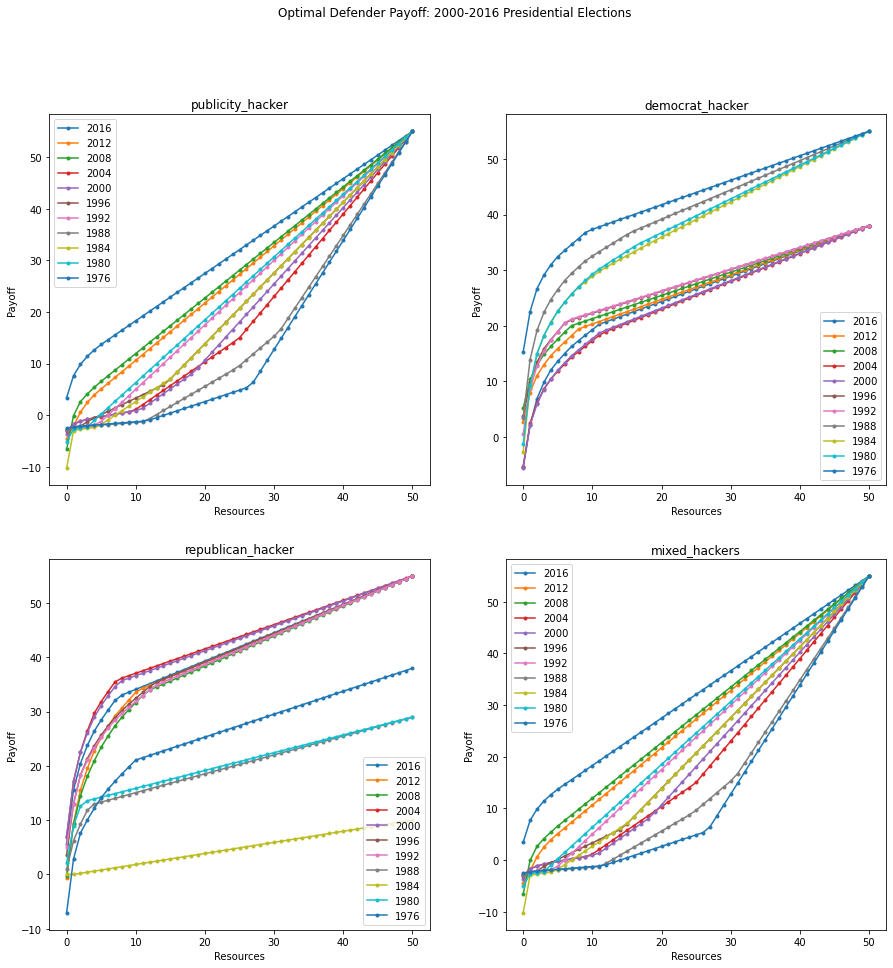

In [36]:
import time
from election_functions import ElectionGame
from eraser import Eraser
from election_functions import get_election_results, get_reward_matrices, get_rep_states, get_dem_states
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

description_list = ['publicity_hacker','democrat_hacker','republican_hacker','mixed_hackers']
election_years = [2016,2012,2008,2004,2000, 1996, 1992, 1988, 1984, 1980, 1976]


plt.rcParams['figure.figsize']=(15,15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Optimal Defender Payoff: 2000-2016 Presidential Elections')

hacker_type = 'publicity_hacker'
for election_year in tqdm(election_years):
    payoff_df = pd.DataFrame()
    clean_election_results, state_list, electoral_votes = get_election_results(election_year)
    republican_states = get_rep_states(clean_election_results, state_list)
    democrat_states = get_dem_states(clean_election_results, state_list)

    attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]
    partisan_type_list = [[False],
                          [True],
                          [True],
                          [False,True,True]]
    
    attack_list = attack_targets_list[0]
    partisan_type = partisan_type_list[0]
    
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[0]] = payoffs
    
    ax1.plot(range(51),payoff_df[hacker_type],'.-')
    
# ax1.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
ax1.legend(['2016','2012','2008','2004','2000', '1996', '1992', '1988', '1984', '1980', '1976'])
ax1.set_title(hacker_type)
ax1.set_xlabel('Resources')
ax1.set_ylabel('Payoff')

hacker_type = 'democrat_hacker'
for election_year in tqdm(election_years):
    payoff_df = pd.DataFrame()
    clean_election_results, state_list, electoral_votes = get_election_results(election_year)
    republican_states = get_rep_states(clean_election_results, state_list)
    democrat_states = get_dem_states(clean_election_results, state_list)

    attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]
    partisan_type_list = [[False],
                          [True],
                          [True],
                          [False,True,True]]
    
    attack_list = attack_targets_list[1]
    partisan_type = partisan_type_list[1]
    
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[1]] = payoffs
    
    ax2.plot(range(51),payoff_df[hacker_type],'.-')
    
# ax2.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
ax2.legend(['2016','2012','2008','2004','2000', '1996', '1992', '1988', '1984', '1980', '1976'])
ax2.set_title(hacker_type)
ax2.set_xlabel('Resources')
ax2.set_ylabel('Payoff')

hacker_type = 'republican_hacker'
for election_year in tqdm(election_years):
    payoff_df = pd.DataFrame()
    clean_election_results, state_list, electoral_votes = get_election_results(election_year)
    republican_states = get_rep_states(clean_election_results, state_list)
    democrat_states = get_dem_states(clean_election_results, state_list)

    attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]
    partisan_type_list = [[False],
                          [True],
                          [True],
                          [False,True,True]]
    
    attack_list = attack_targets_list[2]
    partisan_type = partisan_type_list[2]
    
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[2]] = payoffs
    
    ax3.plot(range(51),payoff_df[hacker_type],'.-')
    
# ax3.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
ax3.legend(['2016','2012','2008','2004','2000', '1996', '1992', '1988', '1984', '1980', '1976'])
ax3.set_title(hacker_type)
ax3.set_xlabel('Resources')
ax3.set_ylabel('Payoff')

hacker_type = 'mixed_hackers'
for election_year in tqdm(election_years):
    payoff_df = pd.DataFrame()
    clean_election_results, state_list, electoral_votes = get_election_results(election_year)
    republican_states = get_rep_states(clean_election_results, state_list)
    democrat_states = get_dem_states(clean_election_results, state_list)

    attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]
    partisan_type_list = [[False],
                          [True],
                          [True],
                          [False,True,True]]
    
    attack_list = attack_targets_list[3]
    partisan_type = partisan_type_list[3]
    
    # Get reward matrices
    att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)

    payoffs = []
    for i in range(51):
        sec_game = ElectionGame(max_coverage=i+1, num_attacker_types=len(
            attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
        eraser_solver = Eraser(sec_game)
        eraser_solver.solve()
        payoffs.append(eraser_solver.opt_defender_payoff)
    payoff_df[description_list[3]] = payoffs
    
    ax4.plot(range(51),payoff_df[hacker_type],'.-')
    
# ax4.plot(range(51), np.max(payoff_df[hacker_type]) * (2 * np.arange(1,52) - 51)/51)
ax4.legend(['2016','2012','2008','2004','2000', '1996', '1992', '1988', '1984', '1980', '1976'])
ax4.set_title(hacker_type)
ax4.set_xlabel('Resources')
ax4.set_ylabel('Payoff')

fig.savefig('1976_2016_payoff.png', dpi = 300)